In [26]:
#importing libraries
from importlib import reload

import sys, importlib
sys.path.insert(1, '../python/')

importlib.reload(sys.modules['data_utils'])
importlib.reload(sys.modules['pca_utils'])

from data_utils import *
from pca_utils import *

from scipy.io import loadmat

import os
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
#specify folder and session of the experiment
folder = 'JawsM15' #ChrM04 or JawsM15 or C57_2_DualTask
session = '20200609' #20200521-6 or 20200605-09 or 20200116-20

In [5]:
data = loadmat('../DataForAlexandre/' + folder + '/' + session + 'SumFluoTraceFile' + '.mat')

In [6]:
X_fluo = np.rollaxis(data['C_df'],1,0)
X_fluo_df = np.rollaxis(data['dFF0'],1,0)
X_rates = np.rollaxis(data['S_dec'],1,0)
y_labels = data['Events'].transpose()

In [7]:
print('data.shape')
print('#trials, #neuron, #frames (time)')
print(X_fluo.shape)
print(X_fluo_df.shape)
print(X_rates.shape)

print('labels.shape')
print('#labels, #trials')
print(y_labels.shape)

data.shape
#trials, #neuron, #frames (time)
(192, 1423, 121)
(192, 1423, 121)
(192, 1423, 121)
labels.shape
#labels, #trials
(9, 192)


In [8]:
print('data has nan?')
print(np.isnan(X_fluo).any())
print(np.isnan(X_fluo_df).any())
print(np.isnan(X_rates).any())
print('labels has nan?')
print(np.isnan(y_labels).any())

data has nan?
False
False


False
labels has nan?
False


In [27]:
y_trials = which_trials(y_labels, 'ND_trials')

In [28]:
print(y_trials.shape)
print(y_trials)

(32,)
[  2   6  18  23  25  36  37  39  48  52  55  63  78  84  93  94  96 104
 111 112 122 123 129 136 152 153 159 161 177 183 185 191]


In [29]:
X_trials = X_fluo_df[y_trials]
print(X_trials.shape)

(32, 1423, 121)


In [30]:
from data_utils import bin_data
X_bin = bin_data(X_trials,1.5,3) # 3 frames = 500ms if bin_step = 1.5 and bin_size = 3 then data is binned in 500ms bins with .5 overlap
print(X_bin.shape)

(32, 1423, 80)


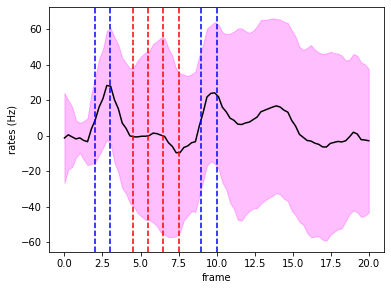

In [31]:
time = np.linspace(0,20,X_bin.shape[2]);
X_window = np.mean(X_bin, axis=1) # avg over neurons 
X_avg = np.mean(X_window,axis=0)*1000 # avg over trials 
X_std = np.std(X_window,axis=0)*1000 # std over trials

plt.plot(time,X_avg,c='k')
plt.fill_between(time, X_avg - X_std, X_avg + X_std, alpha=0.25, color='magenta')

plt.axvline(x=2, c='b', ls='--') # DPA sample onset 
plt.axvline(x=3, c='b', ls='--')

plt.axvline(x=9, c='b', ls='--') # DPA test onset
plt.axvline(x=10, c='b', ls='--')

plt.axvline(x=4.5, c='r', ls='--') # DRT distractor onset
plt.axvline(x=5.5, c='r', ls='--')

plt.axvline(x=6.5, c='r', ls='--') # DRT cue onset
plt.axvline(x=7.5, c='r', ls='--')

plt.xlabel('frame') ;
plt.ylabel('rates (Hz)') ;

In [32]:
dX_bin = X_bin - np.mean(X_bin, axis=0) # avg over trials
print(dX_bin.shape)

X_bin_reshaped = np.reshape((X_bin), (X_bin.shape[0]*X_bin.shape[1], X_bin.shape[2])).transpose()
print(X_bin_reshaped.shape)

dX_bin_reshaped = np.reshape((dX_bin), (dX_bin.shape[0]*dX_bin.shape[1], dX_bin.shape[2])).transpose()
print(dX_bin_reshaped.shape)

(32, 1423, 80)
(80, 45536)
(80, 45536)


In [44]:
X_bin_avg = np.mean(X_bin, axis=0) # if axis 0 avg over trials if axis 1 avg over neurons
dX_bin_avg = X_bin_avg - np.mean(X_bin_avg, axis=0)

X_bin_avg = X_bin_avg.transpose()
dX_bin_avg = dX_bin_avg.transpose()

print(X_bin_avg.shape)
print(dX_bin_avg.shape)

(80, 1423)
(80, 1423)


(3, 80)
[0.1872179  0.1255589  0.09412548]


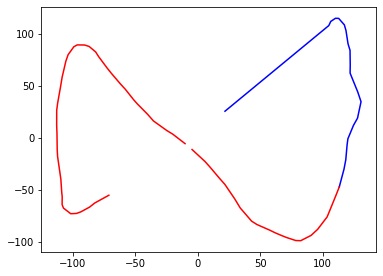

In [45]:
pca = PCA(n_components=3)
X_window = dX_bin_reshaped #StandardScaler().fit_transform()
a = pca.fit_transform(X_window)
a = a.transpose()
print(a.shape)
b = pca.explained_variance_ratio_
print(b)
plt.plot(a[0][0:20],a[2][0:20],c='b')
plt.plot(a[0][19:40],a[2][19:40],c='r')
plt.plot(a[0][40:80],a[2][40:80],c='r')

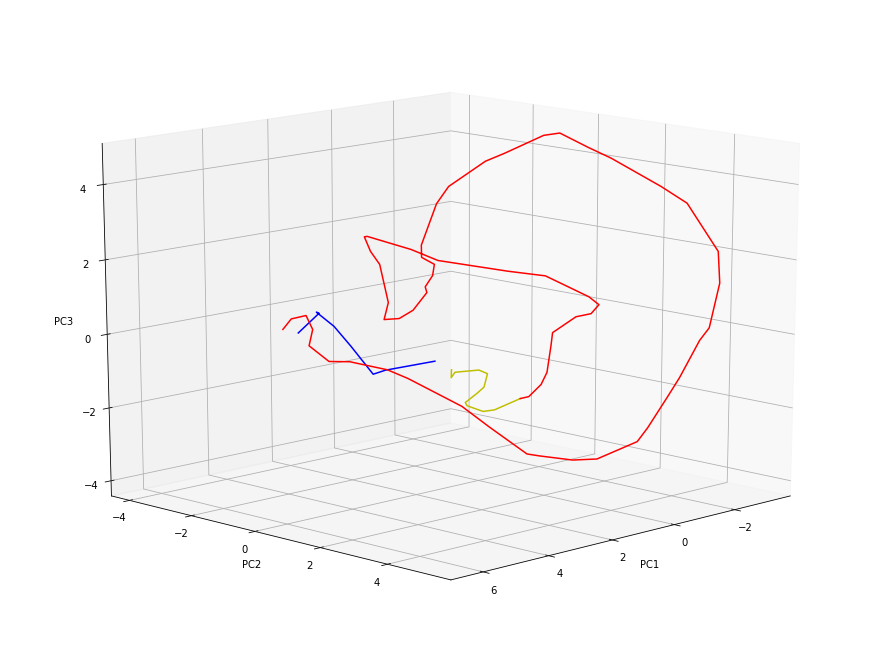

In [41]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[1, 3, 3,3], azim=45, elev=15)
ax.plot(a[0][0:8], a[1][0:8], a[2][0:8], 'b')
ax.plot(a[0][8:20], a[1][8:20], a[2][8:20], 'y')
ax.plot(a[0][19:80], a[1][19:80], a[2][19:80], 'r')
plt.xlabel('PC1') ;
plt.ylabel('PC2') ;
ax.set_zlabel('PC3') ;